In [44]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

rcParams['figure.figsize'] = 15, 6
data = pd.read_csv('C:/Users/JP/Documents/School/Practicum/Github/Practicum/data/dataset.csv')

df = pd.DataFrame(data[['Date','ETHOpen']])
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Date')
df=df[df.index>'2017-05-30']
#df=np.log(df)



In [45]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
 

X = difference(df.values)



Test MSE: 818.324


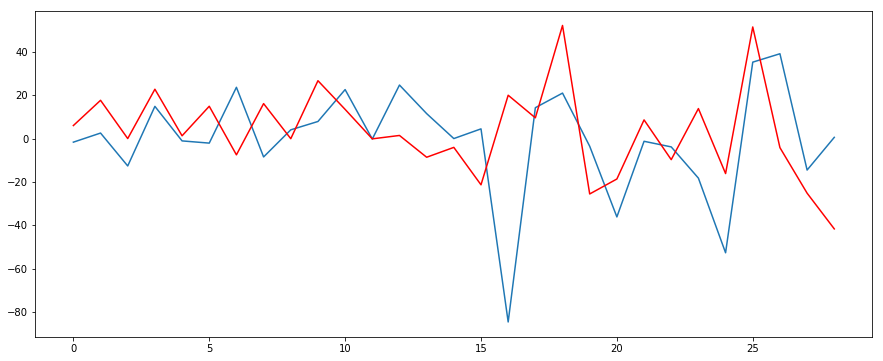

In [46]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=20, disp=False)
window = model_fit.k_ar
coef = model_fit.params

history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot((test))
pyplot.plot((predictions), color='red')
pyplot.show()

In [47]:
# fit model
model = AR(X)
model_fit = model.fit(maxlag=20, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [df.values[-1]])
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy')
window_size = 20
model = AR(X)
model_fit = model.fit(maxlag=window_size, disp=False)
coef = model_fit.params
lag = X[-window_size:]

 
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
 
prediction = predict(coef, lag)

yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

[ 0.34114179 -0.15943767 -0.23245229  0.12289523  0.15219402  0.06512125
  0.10767261  0.08377485  0.18209962 -0.1304078  -0.29345447 -0.00303218
 -0.08104212  0.22169054  0.11429494  0.2040641   0.07122302  0.01970933
 -0.03480528 -0.30603565 -0.25786326]
Prediction: 270.069241
